In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [2]:
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

In [3]:
# For time stamps
from datetime import datetime

In [4]:
#predicting the closing price of Beximco 
# Get the stock quote
df = pdr.get_data_yahoo('BATAINDIA.NS', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-02,267.500000,267.500000,259.100006,264.975006,241.625488,681876
2012-01-03,269.399994,274.350006,267.399994,270.075012,246.276154,766584
2012-01-04,270.549988,282.000000,267.500000,277.700012,253.229172,1111662
2012-01-05,278.000000,289.225006,278.000000,282.350006,257.469421,1615768
2012-01-06,283.350006,288.024994,278.049988,280.100006,255.417694,1469840
...,...,...,...,...,...,...
2023-03-23,1410.000000,1421.900024,1405.250000,1416.300049,1416.300049,290467
2023-03-24,1418.000000,1419.150024,1400.599976,1416.400024,1416.400024,843508
2023-03-27,1420.150024,1420.400024,1383.699951,1399.300049,1399.300049,276549


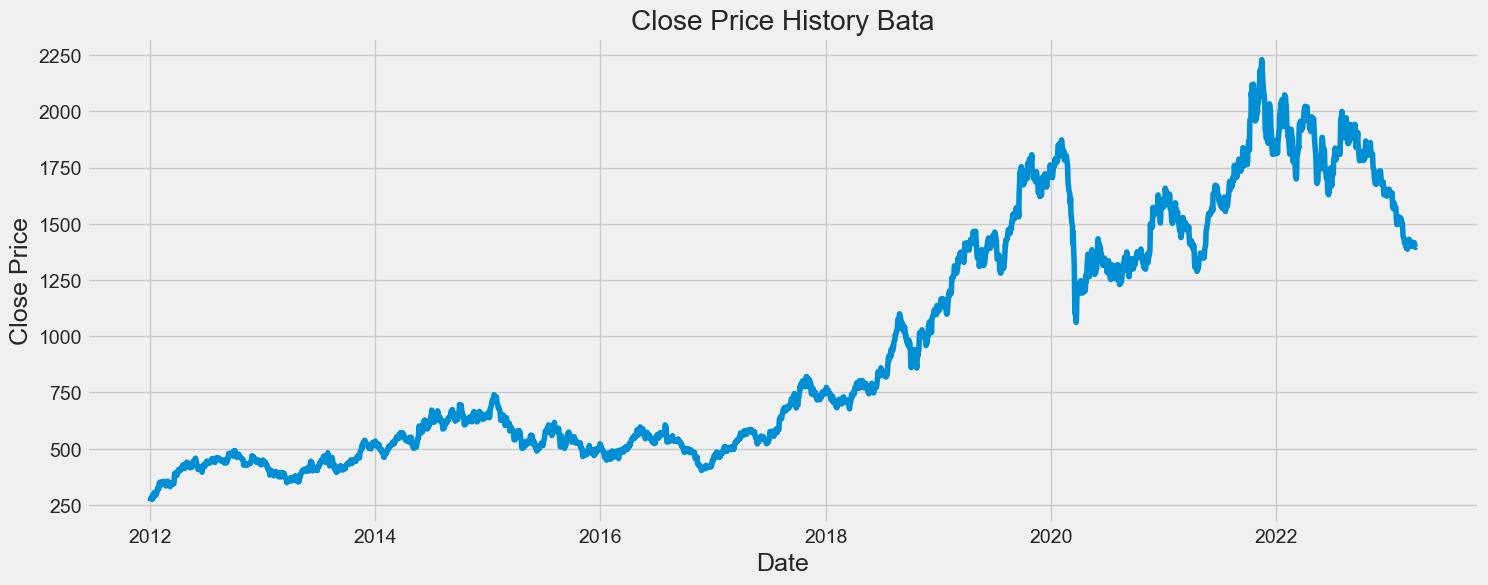

In [6]:
plt.figure(figsize=(16,6))
plt.title('Close Price History Bata')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [7]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2636

In [8]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.        ],
       [0.00259592],
       [0.00647707],
       ...,
       [0.57737481],
       [0.57500794],
       [0.57640769]])

In [9]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

[array([0.        , 0.00259592, 0.00647707, 0.00884393, 0.00769867,
       0.00553541, 0.01486288, 0.01417574, 0.00799134, 0.01287777,
       0.02058916, 0.01892218, 0.01658076, 0.01795508, 0.01385761,
       0.01780238, 0.02158172, 0.02481389, 0.03216898, 0.02875867,
       0.04007126, 0.03957498, 0.04297257, 0.04392695, 0.04114016,
       0.03757713, 0.04066933, 0.04270535, 0.04365973, 0.04402876,
       0.04345613, 0.04561939, 0.04536489, 0.0450213 , 0.0433925 ,
       0.03513393, 0.04143284, 0.03664821, 0.03849335, 0.04597568,
       0.04323979, 0.04195456, 0.04208181, 0.03687726, 0.03613921,
       0.03361964, 0.04031303, 0.03919323, 0.04270535, 0.04112743,
       0.03919323, 0.04214544, 0.04032576, 0.04974232, 0.0618693 ,
       0.05763186, 0.06474517, 0.06451613, 0.06410891, 0.06128395])]
[0.05950244369733304]

[array([0.        , 0.00259592, 0.00647707, 0.00884393, 0.00769867,
       0.00553541, 0.01486288, 0.01417574, 0.00799134, 0.01287777,
       0.02058916, 0.01892218, 0.01

(2576, 60, 1)

In [30]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(120, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2576/2576 [==============================] - 37s 13ms/step - loss: 0.0011


In [31]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 13ms/step


23.644217735508658

C:\Users\Mir Info\AppData\Local\Temp\ipykernel_12108\2954939400.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


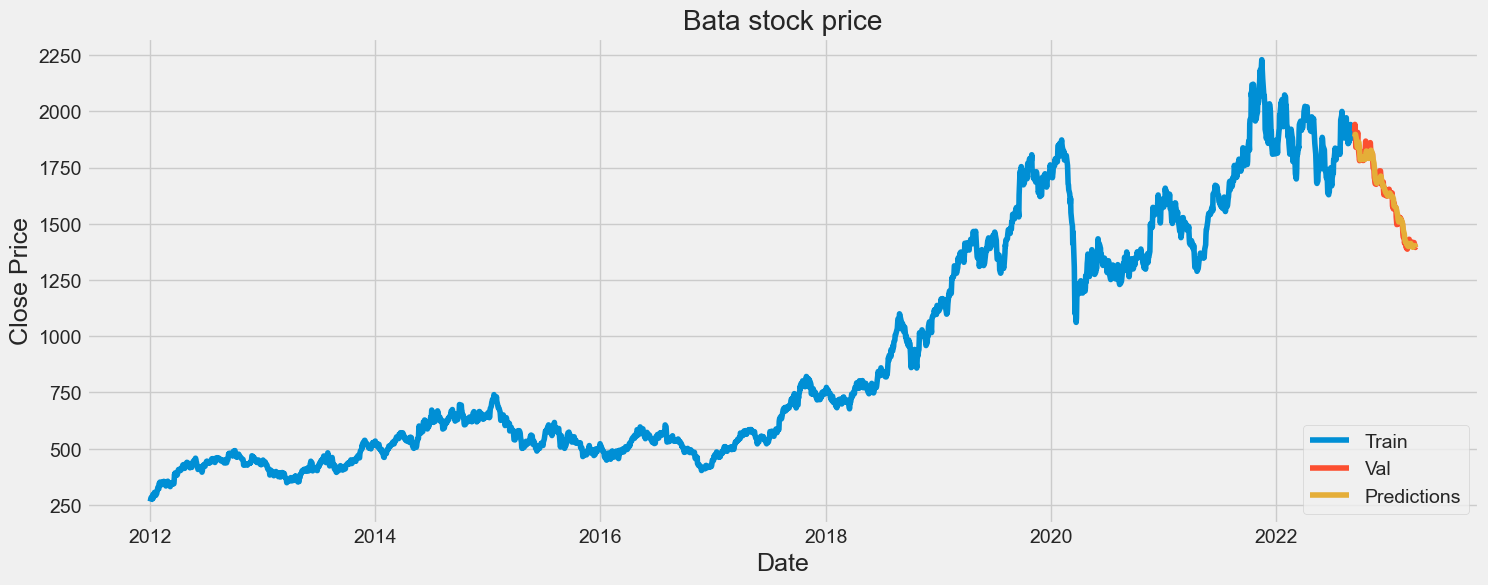

In [34]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Bata stock price')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [33]:
#show the valid an predicted values 
pd.set_option('display.max_rows', None)
valid

,Close,Predictions
Date,,
2022-09-12,1912.300049,1884.016846
2022-09-13,1941.800049,1886.539185
2022-09-14,1900.400024,1897.197754
2022-09-15,1888.900024,1897.186646
2022-09-16,1840.199951,1889.776855
2022-09-19,1850.000000,1868.400513
2022-09-20,1854.250000,1850.224731
2022-09-21,1877.349976,1840.110107
2022-09-22,1906.099976,1843.161499
